In [42]:
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import cv2
%matplotlib inline

# Train code

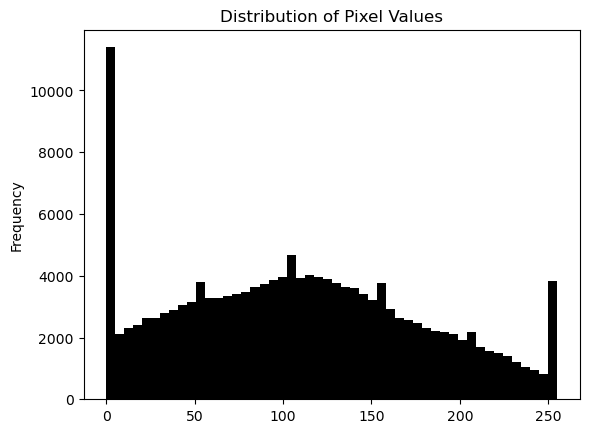

In [10]:
df = pd.read_csv('fungi_train.csv')
img_plt = plt.imread(df['Path'][1005])
pd.Series(img_plt.flatten()).plot(kind='hist',
                                  color = 'black',
                                  bins = 50,
                                  title = 'Distribution of Pixel Values')
plt.show()

# display image


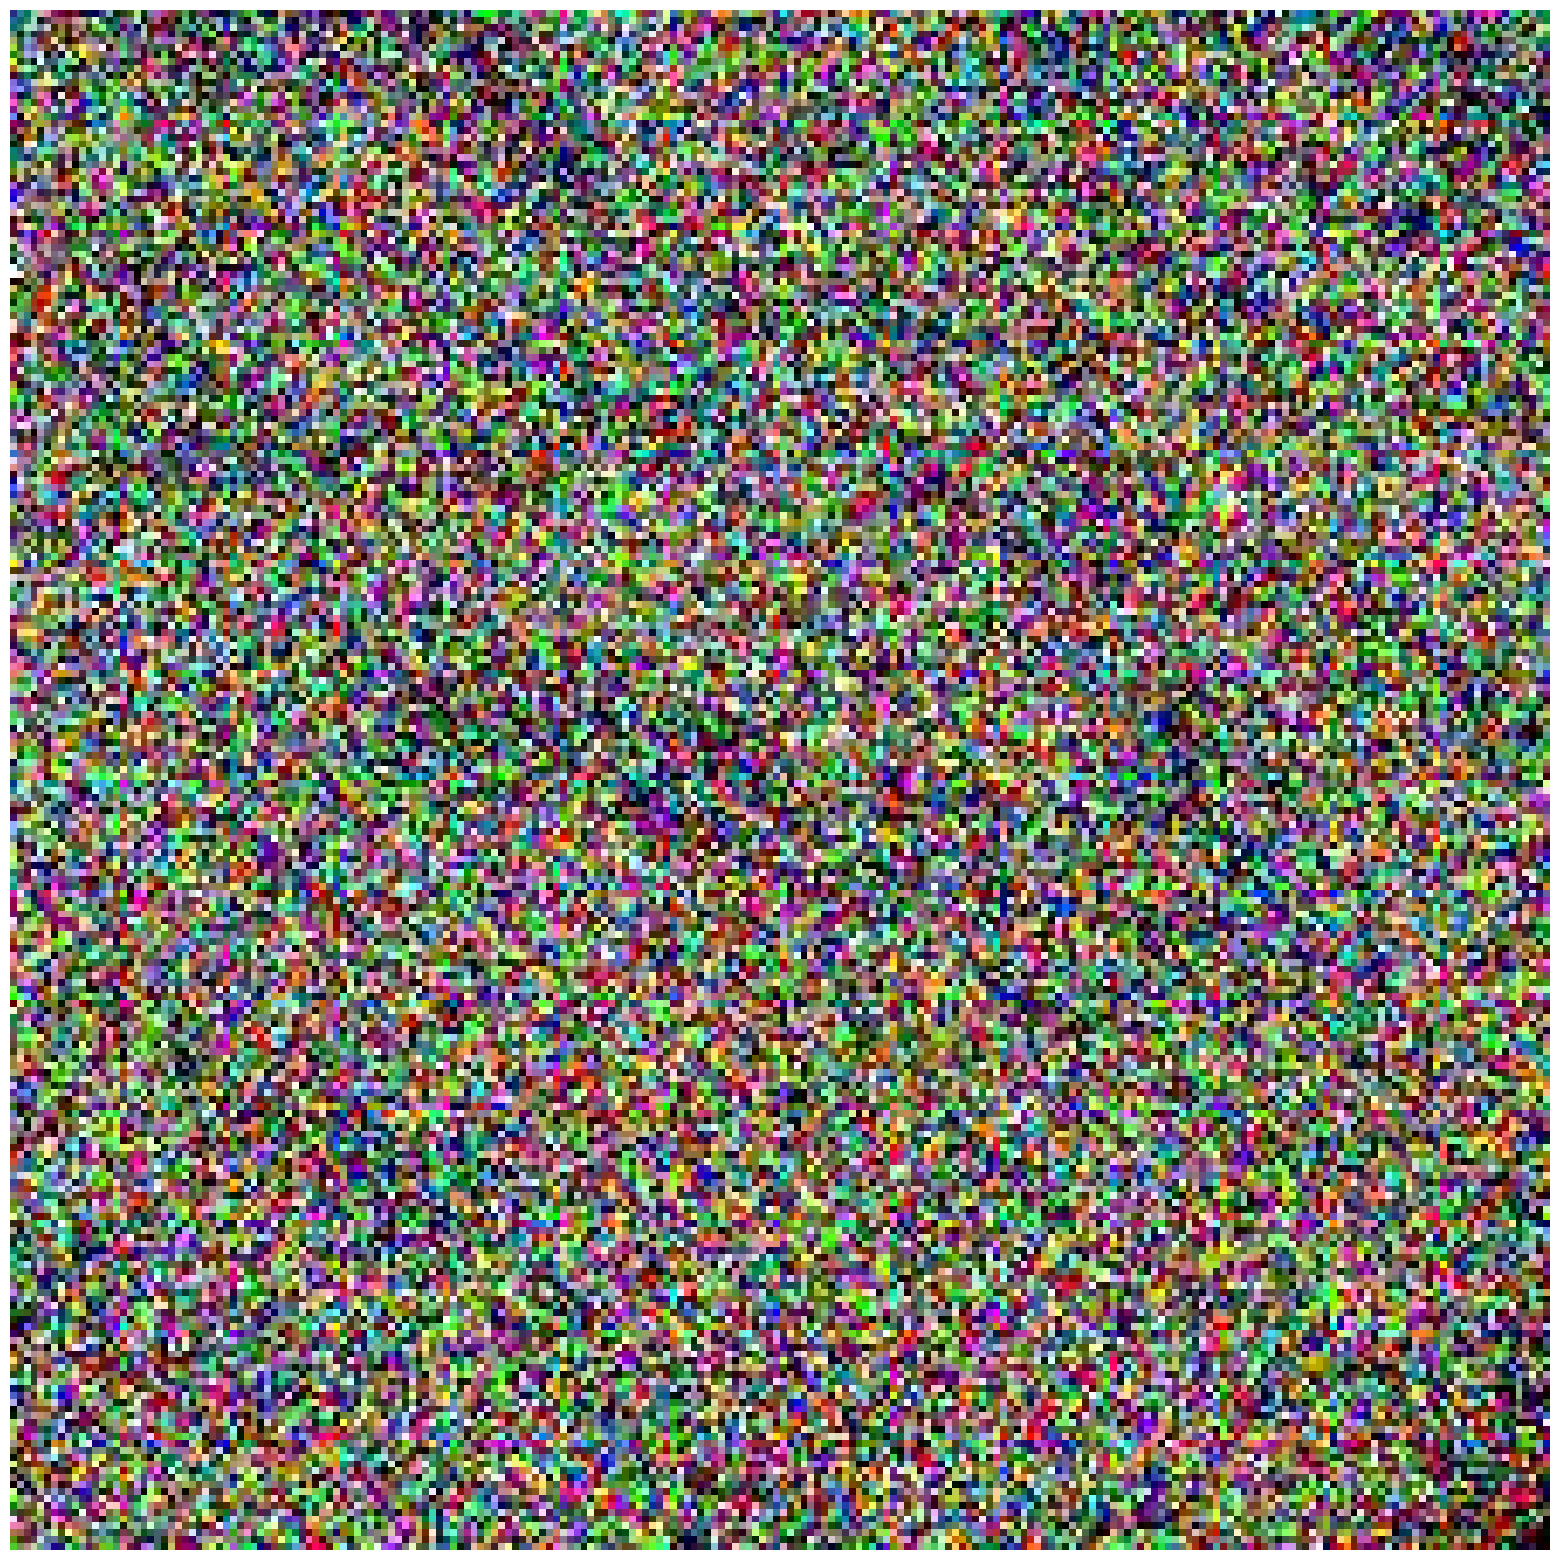

In [13]:
fig, ax = plt.subplots(figsize = (20,20))
ax.imshow(img_plt)
ax.axis('off')
plt.show()

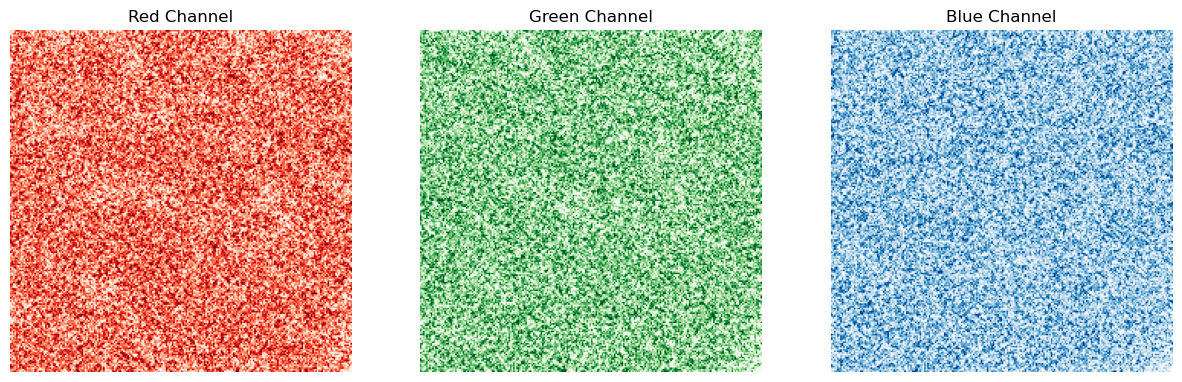

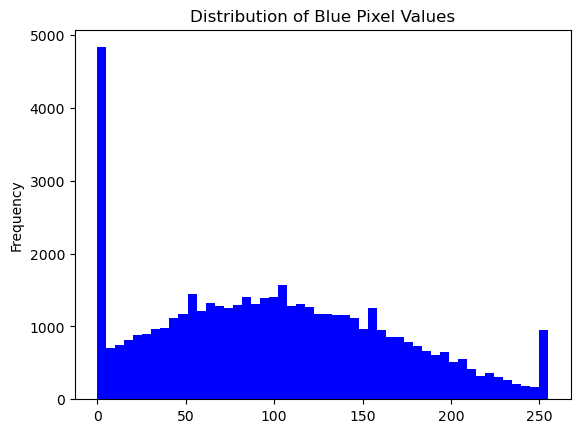

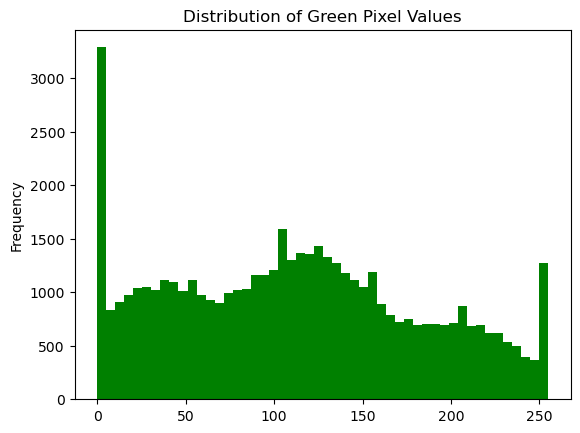

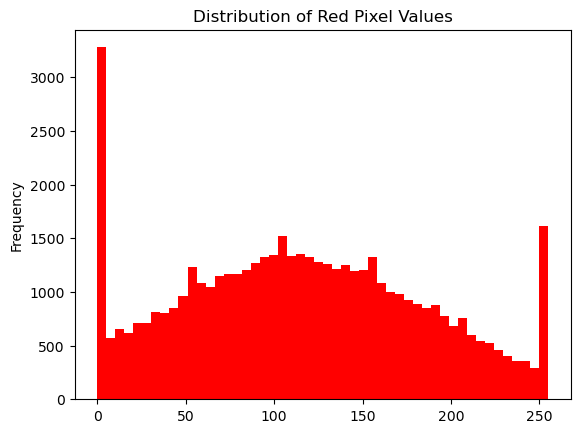

In [14]:
#Display RGB channels
fig, axs = plt.subplots(1,3, figsize = (15,5))
axs[0].imshow(img_plt[:, :, 0], cmap = 'Reds')
axs[1].imshow(img_plt[:, :, 1], cmap = 'Greens')
axs[2].imshow(img_plt[:, :, 2], cmap = 'Blues')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Red Channel')
axs[1].set_title('Green Channel')
axs[2].set_title('Blue Channel')
plt.show()
pd.Series(img_plt[:, :, 2].flatten()).plot(kind='hist',
                                  bins = 50,
                                           color = 'blue',
                                  title = 'Distribution of Blue Pixel Values')
plt.show()
pd.Series(img_plt[:, :, 1].flatten()).plot(kind='hist',
                                           color = 'green',
                                  bins = 50,
                                  title = 'Distribution of Green Pixel Values')
plt.show()
pd.Series(img_plt[:, :, 0].flatten()).plot(kind='hist',
                                           color = 'red',
                                           bins = 50,
                                           title = 'Distribution of Red Pixel Values')
plt.show()

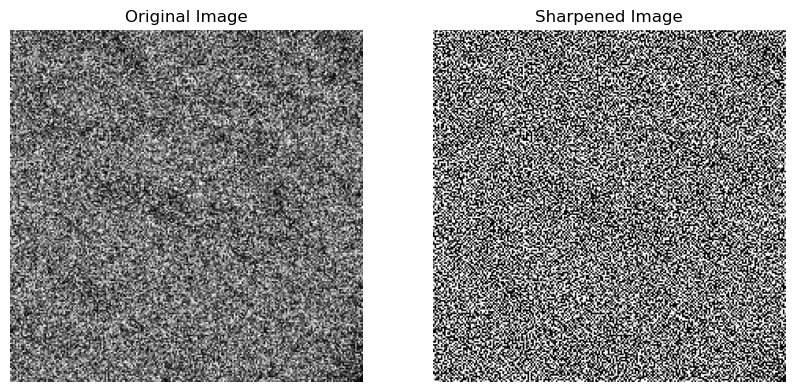

array([[ 69.5729, 255.    ,   7.9897, ..., 255.    ,   8.9485, 255.    ],
       [238.2461,   0.    ,   0.    , ...,  12.3591,  52.7436,  18.4453],
       [ 68.7177, 126.6987, 255.    , ...,   0.    , 255.    , 255.    ],
       ...,
       [243.3601, 159.4044,  41.6342, ...,  16.2407,   0.    ,  28.2619],
       [232.9958,   0.    ,   0.    , ...,   0.    ,   0.    ,   0.    ],
       [255.    , 255.    , 255.    , ..., 170.2283,   0.    ,  24.4345]])

In [16]:
img_gray = np.dot(img_plt[..., :3], [0.2989, 0.5870, 0.1140])  # Convert to grayscale using weights

# Define a sharpening kernel
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

# Function to apply a 2D convolution manually
def apply_convolution(image, kernel):
    """Applies a convolution operation to a grayscale image using a given kernel."""
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    # Pad the image to handle edges
    padded_image = np.pad(image, ((pad_h, pad_w)), mode='constant', constant_values=0)

    # Output array
    new_image = np.zeros_like(image)

    # Apply convolution
    for i in range(h):
        for j in range(w):
            new_image[i, j] = np.sum(padded_image[i:i+kh, j:j+kw] * kernel)

    return np.clip(new_image, 0, 255)  # Ensure pixel values are in the valid range

# Apply the convolution function
sharpened_img = apply_convolution(img_gray, sharpen_kernel)
# Display the original and sharpened images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img_gray, cmap='gray')
axs[0].set_title("Original Image")
axs[0].axis('off')

axs[1].imshow(sharpened_img, cmap='gray')
axs[1].set_title("Sharpened Image")
axs[1].axis('off')
plt.show()
sharpened_img

# Start of Training on Set

In [24]:
d = {}
# Define the sharpening kernel
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

# Function to apply a 2D convolution manually
def apply_convolution(image, kernel):
    """Applies a convolution operation to a grayscale image using a given kernel."""
    h, w = image.shape
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2

    # Pad the image to handle edges
    padded_image = np.pad(image, ((pad_h, pad_w)), mode='constant', constant_values=0)

    # Output array
    new_image = np.zeros_like(image)

    # Apply convolution
    for i in range(h):
        for j in range(w):
            new_image[i, j] = np.sum(padded_image[i:i+kh, j:j+kw] * kernel)

    return np.clip(new_image, 0, 255)  # Ensure pixel values are in the valid range

In [ ]:
for i in range(1, len(df['Path']), 500):
    
    img_plt = plt.imread(df['Path'][i])

    red_flat = img_plt[:, :, 0].flatten()
    avg_red = np.mean(red_flat)
    
    green_flat = img_plt[:, :, 2].flatten()
    avg_green = np.mean(green_flat)
    
    blue_flat = img_plt[:, :, 2].flatten()
    avg_blue = np.mean(blue_flat)

    luminosity = (avg_red*0.2989) + (avg_green*0.5870) + (avg_blue*0.1140)

    # Convert RGB to HSV
    img_hsv = cv2.cvtColor((img_plt * 255).astype('uint8'), cv2.COLOR_RGB2HSV)

    hue_flat = img_hsv[:, :, 0].flatten()
    saturation_flat = img_hsv[:, :, 1].flatten()
    value_flat = img_hsv[:, :, 2].flatten()

    # Plot HSV Histograms
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    pd.Series(hue_flat).plot(kind='hist', bins=50, color='purple', alpha=0.7)
    plt.title('Hue Distribution (Class ID: ' + str(df['ClassId'][i]) + ')')

    plt.subplot(1, 3, 2)
    pd.Series(saturation_flat).plot(kind='hist', bins=50, color='orange', alpha=0.7)
    plt.title('Saturation Distribution (Class ID: ' + str(df['ClassId'][i]) + ')')

    plt.subplot(1, 3, 3)
    pd.Series(value_flat).plot(kind='hist', bins=50, color='gray', alpha=0.7)
    plt.title('Value Distribution (Class ID: ' + str(df['ClassId'][i]) + ')')

    plt.tight_layout()
    plt.show()

    # sharpened_channels = []  # Initialize an empty list to store sharpened channels

    # for i in range(3):  # Loop over R, G, B channels
    #     sharpened_channel = cv2.filter2D(img_plt[:, :, i], -1, sharpen_kernel)  # Apply sharpening
    #     sharpened_channels.append(sharpened_channel)  # Store the sharpened channel
    
    # # Convert the list into a NumPy array with the same shape as the original image
    # sharpened_img = np.stack(sharpened_channels, axis=2)

    # fig, ax = plt.subplots(figsize = (10,10))
    # ax.imshow(sharpened_img)
    # ax.axis('off')
    # plt.show()
    
    # sharpened_img
    # pd.Series(sharpened_img.flatten()).plot(kind='hist',
    #                               color = 'black',
    #                               bins = 50,
    #                               title = 'Distribution of Gray Pixel Values of Class ID: '+ str(df['ClassId'][i]) + ' with luminosity: ' + str(luminosity))
    # plt.show()

In [ ]:
# Initialize lists to store feature data
features = []
labels = []

for i in range(1, len(df['Path']), 500):
    img_plt = plt.imread(df['Path'][i])
    class_id = df['ClassId'][i]  # Get class label

    # Convert RGB to HSV
    img_hsv = cv2.cvtColor((img_plt * 255).astype('uint8'), cv2.COLOR_RGB2HSV)

    # Extract histograms for each HSV channel
    hue_hist = np.histogram(img_hsv[:, :, 0], bins=50, range=(0, 255))[0]
    sat_hist = np.histogram(img_hsv[:, :, 1], bins=50, range=(0, 255))[0]
    val_hist = np.histogram(img_hsv[:, :, 2], bins=50, range=(0, 255))[0]

    # Combine histograms into a single feature vector
    feature_vector = np.concatenate([hue_hist, sat_hist, val_hist])
    
    # Store the feature vector and corresponding label
    features.append(feature_vector)
    labels.append(class_id)

# Convert lists to NumPy arrays
X = np.array(features)
y = np.array(labels)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

# Example prediction on a new sample
sample_hist = X_test[0].reshape(1, -1)  # Reshape for single sample prediction
predicted_class = clf.predict(sample_hist)[0]
print(f"Predicted class for sample: {predicted_class}")